In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

main_dir = ''
func_dir = main_dir + 'utils/'
fig_dir = main_dir + 'results/paper_figures/'

import sys
sys.path.insert(0,func_dir)

from neuron_properties_functions import create_empty_mouse_stats_dict, get_split_half_r_all_mice, get_SNR_all_mice, get_max_corr_vals_all_mice, get_evars_all_mice
from fig_6_functions import get_norm_variance_all_mice, get_1_vs_rest_all_mice, make_mouse_df_neuron_properties, make_corr_df_mouse, set_corr_figs_params, add_stars_5_sets,plot_mouse, add_ax_properties_corr, plot_spont_figs
from neuron_properties_functions import create_empty_monkey_stats_dict, get_SNR_monkey_all_dates, get_split_half_r_monkey_all_dates,get_max_corr_vals_monkey_all_dates,get_evar_monkey_all_dates, store_macaque_alphas
from fig_6_functions import make_monkey_df_neuron_properties,make_corr_df_monkey, plot_corr_bars, add_anova_stars_1_set, plot_bars, plot_date, get_one_vs_rest_r_monkey_all_dates, get_electrode_ids_all_dates
from fig_6_functions import get_predictor_indices_elec_ids,get_xtarget_predictor_indices_elecs,get_x_target_overlap_evars
from fig_6_functions import plot_cell_rf_overlaps, plot_rf_overlap_performance, create_df_overlaps
from macaque_data_functions import get_get_condition_type



In [3]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
colors = ['#ddf2f0', '#55C0B7', '#112624']
norm = Normalize(vmin=0, vmax=1)
v4_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
colors = ['#FFE8E8', '#F58B8E', '#551312']
v1_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)

## Mouse neuron properties

### coding

In [ ]:
mouse_stats= create_empty_mouse_stats_dict(main_dir)
get_SNR_all_mice(main_dir, mouse_stats)
get_split_half_r_all_mice(main_dir, mouse_stats)
get_max_corr_vals_all_mice(main_dir, mouse_stats)
get_norm_variance_all_mice(main_dir, mouse_stats)
get_1_vs_rest_all_mice(main_dir, mouse_stats)


#get inter-area predictability 
get_evars_all_mice(main_dir, mouse_stats)
get_evars_all_mice(main_dir, mouse_stats, control_shuffle=True)
get_evars_all_mice(main_dir, mouse_stats, activity_type='spont')
get_evars_all_mice(main_dir, mouse_stats, activity_type='spont', control_shuffle=True)

In [ ]:

#neuron properties once removing 32 dimensions of gray screen activity
get_split_half_r_all_mice(main_dir, mouse_stats, remove_pcs=True)
get_max_corr_vals_all_mice(main_dir, mouse_stats, remove_pcs=True)
get_1_vs_rest_all_mice(main_dir, mouse_stats, remove_pcs=True)

#removing 32 pcs of gray screen activity
get_evars_all_mice(main_dir, mouse_stats, remove_pcs=True)


### plotting

In [4]:
df_mouse_ = make_mouse_df_neuron_properties(mouse_stats , dataset_types=['ori32','natimg32','ori32_spont','natimg32_spont'])
df_mouse=df_mouse_[df_mouse_['control_shuffle']==False]
df_mouse_corr = make_corr_df_mouse(mouse_stats, df_mouse)

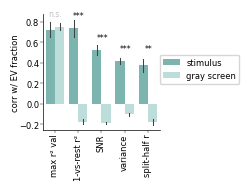

In [5]:

x='Value_Type'
y='corr'
hue='Activity Type'

figsize=(1.5,1.5)
order= df_mouse_corr.Value_Type.unique()[1:]
filter_bool = df_mouse_corr['relationship'].isin(['EV_EV'])
area_bool = df_mouse_corr['Area']=='L2/3'
mask = (~filter_bool)&area_bool
palette=['#72BEB7','#B6E3DF']
hue_order= ['stimulus','gray screen']

fig, ax = plt.subplots(figsize=figsize)
sns.barplot(data=df_mouse_corr[mask], x=x, palette=palette,
            y=y, order=order, hue=hue, hue_order=hue_order,
            errorbar='se', err_kws={'linewidth': 0.75})
set_corr_figs_params(ax, fontsize=6)
ax.legend(loc=(1,0.4), fontsize=6)
add_stars_5_sets(df_mouse_corr[mask], neuron_property=y, x=x,x_order=order, hue=hue, ax=ax, heights=[0.99,0.99,0.8,0.7,0.7], fontsize=5.5)


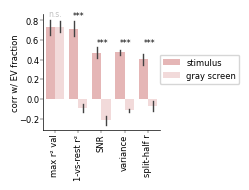

In [6]:
area_bool = df_mouse_corr['Area']=='L4'
mask = (~filter_bool)&area_bool
palette=['#EDAEAE', '#f6d6d6']
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(data=df_mouse_corr[mask], x='Value_Type', palette=palette,
            y='corr', order=order, hue='Activity Type', hue_order=hue_order,
             errorbar='se', err_kws={'linewidth': 1})
set_corr_figs_params(ax, fontsize=6)
sns.despine()
ax.legend(loc=(1,0.4), fontsize=6)
add_stars_5_sets(df_mouse_corr[mask], neuron_property=y, x=x, x_order=order, hue=hue, ax=ax,heights=[0.99,0.99,0.75,0.75,0.75], fontsize=5.5)

In [5]:

df_mouse_both=pd.merge(df_mouse[df_mouse['Activity Type']=='stimulus'],df_mouse[df_mouse['Activity Type']=='gray screen'].rename(columns={'EV':'EV gray screen','max r² val':'max r² val gray screen'}), on=['Mouse', 'Mouse Name', 'Area',
       'Direction', 'SNR', 'split-half r', '1-vs-rest r²',
       'variance', 'control_shuffle','Neuron'])

In [6]:
df_mouse_removed_pcs_= make_mouse_df_neuron_properties(mouse_stats , dataset_types=['ori32','natimg32','ori32_spont','natimg32_spont'], remove_pcs=True)
df_mouse_removed_pcs=df_mouse_removed_pcs_[df_mouse_removed_pcs_['control_shuffle']==False].reset_index(drop=True)
df_mouse_removed_pcs_corr = make_corr_df_mouse(mouse_stats, df_mouse_removed_pcs)
df_mouse_removed_pcs_both=pd.merge(df_mouse_removed_pcs[df_mouse_removed_pcs['Activity Type']=='stimulus'],df_mouse_removed_pcs[df_mouse_removed_pcs['Activity Type']=='gray screen'].rename(columns={'EV':'EV gray screen','max r² val':'max r² val gray screen'}), on=['Mouse', 'Mouse Name', 'Area',
       'Direction', 'SNR', 'split-half r', '1-vs-rest r²',
       'variance', 'control_shuffle','Neuron'])

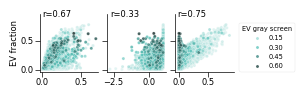

In [9]:
neuron_properties = ['max r² val', 'split-half r', '1-vs-rest r²', ]
area='L2/3'
df_filtered_mouse=df_mouse_both.sample(8000, random_state=17)
df_filtered_mouse_removed=df_mouse_removed_pcs_both.sample(8000, random_state=17)
df_filtered_mouse_sorted = df_filtered_mouse.sort_values('EV gray screen')

figsize=(2.5,0.75)
hspace=0.3
wspace=0.15
fig, axes = plt.subplots(1, 3, figsize=figsize)
for a, (ax, neuron_property) in  enumerate(zip(axes.flatten(), neuron_properties)):
    corr = plot_mouse(df_filtered_mouse_sorted,area, neuron_property, ax,  markersize=5,
                    alpha=0.8, hue='EV gray screen', palette=v4_cmap, legend=True)
    ax.set_ylim(top=max(df_filtered_mouse_sorted[df_filtered_mouse_sorted.Area==area]['EV'].max(),df_filtered_mouse_removed[df_filtered_mouse_removed.Area==area]['EV'].max()) +0.05)
    ax.set_yticks([0,0.5])
    if a==0 or a==3:
        ax.set_ylabel('EV fraction', fontsize=6, labelpad=1)
    else: 
        ax.set_yticklabels('')
        ax.set(ylabel='')
    if a!=2:
        ax.legend_.remove()
    else:
        legend = ax.legend(loc=(1.1,0),fontsize=6*0.8)
        legend.set_title(title='EV gray screen',prop={'size':6*0.8})
        legend.get_frame().set_linewidth(0.2)
    ax.set_xlabel(None)
axes[2].set_xlim(left=df_filtered_mouse['1-vs-rest r²'].min()-0.07, right=df_filtered_mouse['1-vs-rest r²'].max()+0.07)
plt.subplots_adjust(hspace=hspace, wspace=wspace)

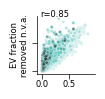

In [10]:

area='L2/3'
df_filtered_mouse_removed=df_mouse_removed_pcs_both.sample(8000, random_state=17)
df_filtered_mouse_removed_sorted = df_filtered_mouse_removed.sort_values('EV gray screen')
hspace=0.3
wspace=0.15
figsize=(0.75,0.75)
fig, ax = plt.subplots(figsize=figsize)

corr = plot_mouse(df_filtered_mouse_removed_sorted,area, neuron_property, ax, markersize=5,
                    alpha=0.8, hue='EV gray screen', palette=v4_cmap, r_pos=(0.05,0.99), legend=False)
ax.set_ylim(top=max(df_filtered_mouse_removed_sorted[df_filtered_mouse_removed_sorted.Area==area]['EV'].max(),df_filtered_mouse_removed_sorted[df_filtered_mouse_removed_sorted.Area==area]['EV'].max()) +0.05)
ax.set_yticks([0,0.5])
ax.set(xlim=(-0.1,1))
ax.set_ylabel('EV fraction\nremoved n.v.a.', fontsize=6, labelpad=1)
ax.set_xlabel(None)
ax.set_yticklabels('')
ax.set_xticks(ticks=[0,0.5])
plt.subplots_adjust(hspace=hspace, wspace=wspace)
axes[2].set_xlim(left=df_filtered_mouse_removed['1-vs-rest r²'].min()-0.07, right=df_filtered_mouse_removed['1-vs-rest r²'].max()+0.07)
plt.show()


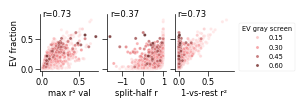

In [11]:
area='L4'
figsize=(2.5,0.75)
fig, axes = plt.subplots(1, 3, figsize=figsize)
for a, (ax, neuron_property) in  enumerate(zip(axes.flatten(), neuron_properties)):
    corr = plot_mouse(df_filtered_mouse_sorted,area, neuron_property, ax, markersize=5, 
                     alpha=0.8, hue='EV gray screen', palette=v1_cmap)
    ax.set_ylim(top=max(df_filtered_mouse_sorted[df_filtered_mouse_sorted.Area==area]['EV'].max(),df_filtered_mouse_removed[df_filtered_mouse_removed.Area==area]['EV'].max()) +0.05)
    ax.set_yticks([0,0.5])
    if a==0 or a==3:
        ax.set_ylabel('EV fraction', fontsize=6, labelpad=1)
    else: 
        ax.set_yticklabels('')
        ax.set(ylabel='')
    ax.set_xlabel(neuron_property,labelpad=1)
    if a!=2:
        ax.legend_.remove()
    else:
        legend = ax.legend(loc=(1.1,0),fontsize=6*0.8)
        legend.set_title(title='EV gray screen',prop={'size':6*0.8})
        legend.get_frame().set_linewidth(0.2)

axes[2].set_xlim(left=df_filtered_mouse['1-vs-rest r²'].min()-0.07, right=df_filtered_mouse['1-vs-rest r²'].max()+0.07)
plt.subplots_adjust(hspace=hspace, wspace=wspace)

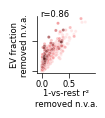

In [12]:

area='L4'
fontsize=6
figsize=(0.75,0.75)
fig, ax = plt.subplots(figsize=figsize)
corr = plot_mouse(df_filtered_mouse_removed_sorted,area, neuron_property, ax, 
                    alpha=0.8, hue='EV gray screen', palette=v1_cmap, markersize=5, r_pos=(0.05,0.99))
ax.set_ylim(top=max(df_filtered_mouse_removed_sorted[df_filtered_mouse_removed_sorted.Area==area]['EV'].max(),df_filtered_mouse_removed_sorted[df_filtered_mouse_removed_sorted.Area==area]['EV'].max()) +0.05)
ax.set_yticks([0,0.5])
ax.set(xlim=(-0.1,1))
ax.set_ylabel('EV fraction\nremoved n.v.a.', fontsize=fontsize, labelpad=1)
ax.set_xlabel('1-vs-rest r²\nremoved n.v.a.', fontsize=fontsize,labelpad=0)
ax.legend_.remove()
ax.set_yticklabels('')
ax.set_xticks(ticks=[0,0.5])
plt.subplots_adjust(hspace=hspace, wspace=wspace)
axes[2].set_xlim(left=df_filtered_mouse_removed_sorted['1-vs-rest r²'].min()-0.07, right=df_filtered_mouse_removed_sorted['1-vs-rest r²'].max()+0.07)
plt.show()

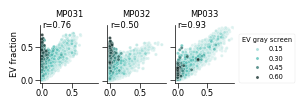

In [13]:
neuron_property = '1-vs-rest r²'
area='L2/3'

figsize=(2.5,0.75)
hspace=0.3
wspace=0.15
fig, axes = plt.subplots(1, 3, figsize=figsize)
mouse_names = df_mouse_both['Mouse Name'].unique()
for a, (ax, mouse_name) in  enumerate(zip(axes.flatten(), mouse_names)):
    mini_mouse_df = df_mouse_both[df_mouse_both['Mouse Name']==mouse_name].reset_index()
    mini_mouse_df_sorted = mini_mouse_df.sort_values('EV gray screen')
    corr = plot_mouse(mini_mouse_df_sorted,area, neuron_property, ax,
                    alpha=0.8, hue='EV gray screen', palette=v4_cmap, markersize=5)
    add_ax_properties_corr(a, ax, df_mouse_both, neuron_property)
    ax.set_title(mouse_name, fontsize=6)
plt.subplots_adjust(hspace=hspace, wspace=wspace)



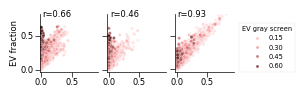

In [15]:
neuron_property = '1-vs-rest r²'
area='L4'

fig, axes = plt.subplots(1, 3, figsize=figsize)
mouse_names = df_mouse_both['Mouse Name'].unique()
for a, (ax, mouse_name) in  enumerate(zip(axes.flatten(), mouse_names)):
    mini_mouse_df = df_mouse_both[df_mouse_both['Mouse Name']==mouse_name].reset_index()
    mini_mouse_df_sorted = mini_mouse_df.sort_values('EV gray screen')
    corr = plot_mouse(mini_mouse_df_sorted,area, neuron_property, ax, 
                    alpha=0.8, hue='EV gray screen', palette=v1_cmap, markersize=5)
    add_ax_properties_corr(a, ax, df_mouse_both, neuron_property)
plt.subplots_adjust(hspace=hspace, wspace=wspace)



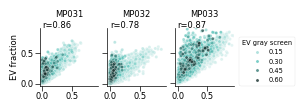

In [17]:
neuron_property = '1-vs-rest r²'
area='L2/3'

figsize=(2.5,0.75)
hspace=0.3
wspace=0.15
fig, axes = plt.subplots(1, 3, figsize=figsize)
mouse_names = df_mouse_removed_pcs_both['Mouse Name'].unique()
for a, (ax, mouse_name) in  enumerate(zip(axes.flatten(), mouse_names)):
    mini_mouse_df = df_mouse_removed_pcs_both[df_mouse_removed_pcs_both['Mouse Name']==mouse_name].reset_index()
    mini_mouse_df_sorted = mini_mouse_df.sort_values('EV gray screen')
    corr = plot_mouse(mini_mouse_df_sorted,area, neuron_property, ax, r_pos= (0.05, 1),
                    alpha=0.8, hue='EV gray screen', palette=v4_cmap, markersize=5)
    add_ax_properties_corr(a, ax, df_mouse_removed_pcs_both, neuron_property)
    ax.set_title(mouse_name, fontsize=6, y=1.05)
plt.subplots_adjust(hspace=hspace, wspace=wspace)

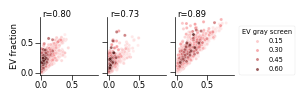

In [18]:

area='L4'
fig, axes = plt.subplots(1, 3, figsize=figsize)
mouse_names = df_mouse_removed_pcs_both['Mouse Name'].unique()
for a, (ax, mouse_name) in  enumerate(zip(axes.flatten(), mouse_names)):
    mini_mouse_df = df_mouse_removed_pcs_both[df_mouse_removed_pcs_both['Mouse Name']==mouse_name].reset_index()
    mini_mouse_df_sorted = mini_mouse_df.sort_values('EV gray screen')
    corr = plot_mouse(mini_mouse_df_sorted,area, neuron_property, ax, r_pos= (0.05, 1),
                    alpha=0.8, hue='EV gray screen', palette=v1_cmap, markersize=5)
    add_ax_properties_corr(a, ax, df_mouse_removed_pcs_both, neuron_property)
plt.subplots_adjust(hspace=hspace, wspace=wspace)

### supplemental

In [7]:
df_mouse_both_nonan= df_mouse_both.dropna().reset_index()
df_mouse_removed_pcs_both_nonan= df_mouse_removed_pcs_both.dropna().reset_index()
df_mouse_both= df_mouse_both_nonan[df_mouse_both_nonan['EV gray screen'].isin(df_mouse_removed_pcs_both_nonan['EV gray screen'])]
df_mouse_removed_pcs_both = df_mouse_removed_pcs_both_nonan[df_mouse_removed_pcs_both_nonan['EV gray screen'].isin(df_mouse_both_nonan['EV gray screen'])]

In [8]:
df_mouse_both['removed\nspont. act.']=False
df_mouse_removed_pcs_both['removed\nspont. act.']=True
df_both_comparison = pd.concat([df_mouse_both, df_mouse_removed_pcs_both])

df_both_comparison_visual = pd.concat([df_mouse_both[(df_mouse_both.SNR>2)&(df_mouse_both['split-half r']>0.8)],df_mouse_removed_pcs_both[(df_mouse_both.SNR>2)&(df_mouse_both['split-half r']>0.8)]])
df_both_comparison_nonvisual = pd.concat([df_mouse_both[(df_mouse_both.SNR<2)&(df_mouse_both['split-half r']<0.8)],df_mouse_removed_pcs_both[(df_mouse_both.SNR<2)&(df_mouse_both['split-half r']<0.8)]])
df_both_comparison_mediumvisual = pd.concat([df_mouse_both[(df_mouse_both.SNR<2)|(df_mouse_both['split-half r']<0.8)],df_mouse_removed_pcs_both[(df_mouse_both.SNR<2)|(df_mouse_both['split-half r']<0.8)]])
df_both_comparison_low_SNR = pd.concat([df_mouse_both[(df_mouse_both.SNR<2)],df_mouse_removed_pcs_both[(df_mouse_both.SNR<2)]])
df_both_comparison_high_SNR = pd.concat([df_mouse_both[(df_mouse_both.SNR>2)],df_mouse_removed_pcs_both[(df_mouse_both.SNR>2)]])

trad_threshold = 0.9
df_both_comparison_high_trad_reli = pd.concat([df_mouse_both[(df_mouse_both['split-half r']>trad_threshold)],df_mouse_removed_pcs_both[(df_mouse_both['split-half r']>trad_threshold)]])
df_both_comparison_low_trad_reli = pd.concat([df_mouse_both[(df_mouse_both['split-half r']<trad_threshold)],df_mouse_removed_pcs_both[(df_mouse_both['split-half r']<trad_threshold)]])

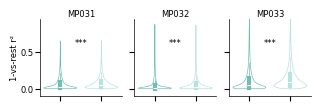

In [9]:
neuron_property = '1-vs-rest r²'
area='L2/3'
x = 'removed\nspont. act.'
hue='removed\nspont. act.'
sample_size=20
seed=17
fontsize=6
figsize=(3.5,1)
stars_height=0.7
fig, axes = plt.subplots(1, 3, figsize=figsize)
plot_spont_figs(df_both_comparison, area, neuron_property, x, hue, axes,sample_size=sample_size, 
                neuron_property_label='1-vs-rest r²',neuron_labels = ['r>mean','r<mean'],
                    legend=False, show_lineplot=False, height=stars_height)
[axes[a].set_xticklabels([]) for a in range(3)]
plt.show()

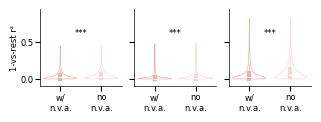

In [10]:
area='L4'
sample_size=20
seed=17
stars_height=0.7
fig, axes = plt.subplots(1, 3, figsize=figsize)
plot_spont_figs(df_both_comparison, area, neuron_property, x, hue, axes,sample_size=sample_size, 
                neuron_property_label='1-vs-rest r²',neuron_labels = ['r>mean','r<mean'],
                    legend=False, show_lineplot=False, height=stars_height)
[axes[a].set_title(None) for a in range(3)]
plt.show()

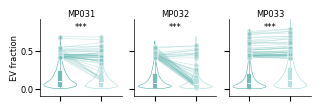

In [11]:
neuron_property = 'EV'
area='L2/3'
sample_size=25
seed=17
fontsize=6
fig, axes = plt.subplots(1, 3, figsize=figsize)
threshold=0.4
height=0.9
plot_spont_figs(df_both_comparison, area, neuron_property, x, hue, axes, threshold=threshold,sample_size=sample_size,
                neuron_property_label='EV fraction',neuron_labels = [f'EV>{threshold}',f'EV<{threshold}'],height=height,
                    legend=False, filter_only_high_neurons=True)
[axes[a].set_xticklabels([]) for a in range(3)]
plt.show()

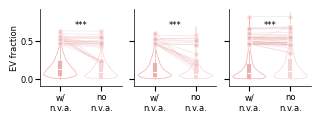

In [12]:
neuron_property = 'EV'
area='L4'
sample_size=25
seed=17
fontsize=6
fig, axes = plt.subplots(1, 3, figsize=figsize)
threshold=0.45
height=0.8
plot_spont_figs(df_both_comparison, area, neuron_property, x, hue, axes, threshold=threshold,sample_size=sample_size,
                neuron_property_label='EV fraction',neuron_labels = [f'EV>{threshold}',f'EV<{threshold}'],height=height,
                    legend=False, filter_only_high_neurons=True)
[axes[a].set_title(None) for a in range(3)]
plt.show()

## Monkey neuron properties

### coding

In [18]:

monkey_stats= create_empty_monkey_stats_dict()
get_SNR_monkey_all_dates(monkey_stats)
get_split_half_r_monkey_all_dates(monkey_stats)
get_max_corr_vals_monkey_all_dates(monkey_stats)
get_one_vs_rest_r_monkey_all_dates(monkey_stats, w_size=25)
store_macaque_alphas(main_dir, monkey_stats, verbose=True)

get_evar_monkey_all_dates(monkey_stats)
get_evar_monkey_all_dates(monkey_stats, control_shuffle=True)

### plotting

In [6]:
df_monkey_ = make_monkey_df_neuron_properties(monkey_stats, dataset_types=list(monkey_stats.keys()))
df_monkey = df_monkey_[df_monkey_.control_shuffle==False]
df_monkey_corr=make_corr_df_monkey(monkey_stats, df_monkey)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


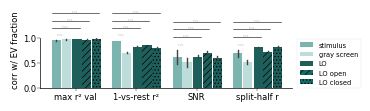

In [7]:
from matplotlib.patches import Patch
plt.rc("hatch", linewidth=0.5)
hatch_size=5
fig, ax = plt.subplots(figsize=(3.25,0.65))
mask, order = plot_corr_bars(df_monkey_corr, ax, area='V4', hatch_size=hatch_size)

star1_positions = np.array([0.08,0.1,0.12,0.14])
star2_positions = star1_positions+ 0.24
star3_positions = star2_positions+ 0.24
star4_positions = star3_positions+ 0.24
x_position_left=-0.395
x_positions_right=np.array([0.07,0.21,0.39])

bar_star_height1 = 1.2
spacing = 0.15
bar_star_heights = np.array([bar_star_height1 + n*spacing for n in range(3)])
bar_heights = bar_star_heights-0.01

add_anova_stars_1_set(df_=df_monkey_corr[mask],x='Value_Type', neuron_property='corr', x1=order[0], height1=1.05,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star1_positions,show_bar=False)
plot_bars(ax, bar_heights,x_position_left, x_positions_right)
add_anova_stars_1_set(df_=df_monkey_corr[mask], neuron_property='corr', x='Value_Type', x1=order[1],height1=1.05,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star2_positions,show_bar=False)
plot_bars(ax, bar_heights,x_position_left+1, x_positions_right+1)
bar_star_heights=bar_star_heights - 0.17
bar_heights = bar_star_heights-0.01
add_anova_stars_1_set(df_monkey_corr[mask], 'corr', x='Value_Type', x1=order[2], height1=0.85,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star3_positions, show_bar=False)
plot_bars(ax, bar_heights,x_position_left+2, x_positions_right+2)
add_anova_stars_1_set(df_monkey_corr[mask], 'corr', x='Value_Type', x1=order[3], height1=0.85,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star4_positions, show_bar=False)
plot_bars(ax, bar_heights,x_position_left+3, x_positions_right+3)
# ax.set_xticks([])
ax.set_ylim(top=1)

handles, labels = ax.get_legend_handles_labels()
legend_colors=['#72BEB7','#B6E3DF','#136a66','#136a66','#136a66']
legend = ax.legend(loc=(1.02,0), fontsize=6*0.8, handles=[handles[0],handles[1], handles[2],Patch(hatch='/' * hatch_size, label=labels[3], facecolor=legend_colors[3]),
                                              Patch(hatch='.' * hatch_size, label=labels[4], facecolor=legend_colors[4])],
        labels=['stimulus', 'gray screen','LO','LO open','LO closed'])
legend.set_title(None)
legend.get_frame().set_linewidth(0.2)
plt.savefig(fig_dir +'fig6_monkey_resp_grayscreen_RS_corrs_V4.eps',transparent=True,bbox_inches='tight')
plt.show()


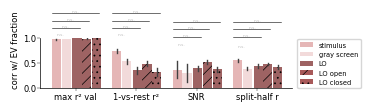

In [8]:
fig, ax = plt.subplots(figsize=(3.25,0.65))
mask, order = plot_corr_bars(df_monkey_corr, ax, area='V1')
star1_positions = np.array([0.08,0.1,0.12,0.14])
star2_positions = star1_positions+ 0.24
star3_positions = star2_positions+ 0.24
star4_positions = star3_positions+ 0.24
x_position_left=-0.395
x_positions_right=np.array([0.07,0.21,0.39])

bar_star_height1 = 1.2
spacing = 0.15
bar_star_heights = np.array([bar_star_height1 + n*spacing for n in range(3)])
bar_heights = bar_star_heights-0.01

add_anova_stars_1_set(df_monkey_corr[mask], 'corr', x='Value_Type', x1=order[0], height1=1.05,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star1_positions,show_bar=False)
plot_bars(ax, bar_heights,x_position_left, x_positions_right)
add_anova_stars_1_set(df_monkey_corr[mask], 'corr', x='Value_Type', x1=order[1],height1=1.05,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star2_positions,show_bar=False)
plot_bars(ax, bar_heights,x_position_left+1, x_positions_right+1)
bar_star_heights=bar_star_heights - 0.17
bar_heights = bar_star_heights-0.01
add_anova_stars_1_set(df_monkey_corr[mask], 'corr', x='Value_Type', x1=order[2], height1=0.85,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star3_positions, show_bar=False)
plot_bars(ax, bar_heights,x_position_left+2, x_positions_right+2)
add_anova_stars_1_set(df_monkey_corr[mask], 'corr', x='Value_Type', x1=order[3], height1=0.8,height2=bar_star_heights[0],height3=bar_star_heights[1], height4=bar_star_heights[2],
hue='Activity Type', ax=ax, fontsize=4, stars1_positions=star4_positions, show_bar=False)
plot_bars(ax, bar_heights,x_position_left+3, x_positions_right+3)
ax.set_ylim(top=1)

hatch_size=3
handles, labels = ax.get_legend_handles_labels()
legend_colors=['#EDAEAE', '#f6d6d6','#a85959','#a85959','#a85959']
legend = ax.legend(loc=(1.02,0), fontsize=6*0.8, handles=[handles[0],handles[1], handles[2],Patch(hatch='/' * hatch_size, label=labels[3], facecolor=legend_colors[3]),
                                              Patch(hatch='.' * hatch_size, label=labels[4], facecolor=legend_colors[4])],
        labels=['stimulus', 'gray screen','LO','LO open','LO closed'])

plt.show()

In [9]:
df_monkey_both=pd.merge(df_monkey[df_monkey['Activity Type']=='stimulus'],df_monkey[df_monkey['Activity Type']=='gray screen'].rename(columns={'EV':'EV gray screen','max r² val':'max r² val gray screen'}), on=['Date', 'Area',
       'Direction', 'SNR', 'split-half r', '1-vs-rest r²','control_shuffle'])
df_monkey_both_sorted = df_monkey_both.sort_values('EV gray screen')

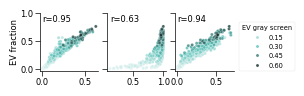

In [10]:
neuron_properties = ['max r² val', 'split-half r','1-vs-rest r²']
area='V4'
figsize=(2.5,0.75)
hspace=0.3
wspace=0.15
fig, axes = plt.subplots(1, 3, figsize=figsize)
for a, (ax, neuron_property) in  enumerate(zip(axes.flatten(), neuron_properties)):
    corr = plot_date(df_monkey_both_sorted,area, neuron_property, ax, r_loc=(0.05,0.85),s=5,
                     alpha=0.8, hue='EV gray screen', palette=v4_cmap)
    ax.set_ylim(top=1)
    ax.set_yticks([0,0.5,1])
    if a==0 or a==3:
        ax.set_ylabel('EV fraction', fontsize=6, labelpad=1)
    else: 
        ax.set_yticklabels('')
        ax.set(ylabel='')
    if a!=2:
        ax.legend_.remove()
    else:
        legend = ax.legend(loc=(1.1,0),fontsize=6*0.8)
        legend.set_title(title='EV gray screen',prop={'size':6*0.8})
        legend.get_frame().set_linewidth(0.2)
    ax.set_xlabel(None)
axes[0].set_xticks(ticks=[0,0.5])
plt.subplots_adjust(hspace=hspace, wspace=wspace)

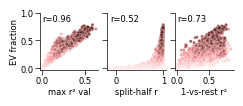

In [11]:
area='V1'

fig, axes = plt.subplots(1, 3, figsize=figsize)
for a, (ax, neuron_property) in  enumerate(zip(axes.flatten(), neuron_properties)):
    corr = plot_date(df_monkey_both_sorted,area, neuron_property, ax, r_loc=(0.05,0.85),s=5,
                    alpha=0.8, hue='EV gray screen', palette=v1_cmap)
    ax.set_ylim(top=1)
    ax.set_yticks([0,0.5,1])
    if a==0 or a==3:
        ax.set_ylabel('EV fraction', fontsize=6, labelpad=1)
    else: 
        ax.set_yticklabels('')
        ax.set(ylabel='')
    ax.legend_.remove()
    
axes[0].set_xticks(ticks=[0,0.5])
plt.subplots_adjust(hspace=hspace, wspace=wspace)

## Monkey RF overlap

### coding

In [3]:
import random
num_seeds = 10
random.seed(17)
# Create a list of random seeds
seeds = [random.randint(1, 10000) for _ in range(num_seeds)]

all_frames_reduced = {'SNR': 5, 'SNR_spont': 5, 'RS': 20, 
                    'RS_open':20, 'RS_closed': 20, 
                    'RF_thin':25, 'RF_large':25, 'RF_thin_spont':25, 'RF_large_spont':25}
all_ini_stim_offs = {'SNR': 400, 'SNR_spont': 200, 'RS': None,
                    'RS_open':None, 'RS_closed': None, 
                    'RF_thin':1000, 'RF_large':1000, 'RF_thin_spont':200, 'RF_large_spont':200}

start_time = time.time()
get_electrode_ids_all_dates(monkey_stats)

ref_area='V4'
condition_types = ['SNR','SNR_spont','RF_thin', 'RF_large', 'RS']
w_size=25
n_splits=10

percent_over=80
percent_under=10
target_x_n=14

for condition_type in condition_types:
    get_predictor_indices_elec_ids(monkey_stats, condition_type, get_get_condition_type(condition_type), target_x_n, percent_over, percent_under)
    get_xtarget_predictor_indices_elecs(monkey_stats, condition_type, get_get_condition_type(condition_type), seeds, ref_area, target_x_n, percent_over, percent_under)
    get_x_target_overlap_evars(monkey_stats, condition_type, get_get_condition_type(condition_type), seeds, 
                            ref_area, target_x_n=target_x_n, percent_over=percent_over, 
                            percent_under=percent_under, w_size=w_size, stim_on=0, stim_off=all_ini_stim_offs[condition_type], 
                            frames_to_reduce=all_frames_reduced[condition_type], n_splits=n_splits, 
                            control_shuffle=False)
    print(condition_type, 'done')
end_time = time.time()
elapsed_time = (end_time - start_time)/60

print(f'yay! RF overlap evar comparisons for area {ref_area} is now completed')
print(f'Took {elapsed_time:.4f} minutes to complete')


SNR done
SNR_spont done
RF_thin done
RF_large done


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RS done
yay! RF overlap evar comparisons for area V4 is now completed
Took 13.6517 minutes to complete


In [21]:
ref_area='V1'
for condition_type in condition_types:
    get_predictor_indices_elec_ids(monkey_stats, condition_type, get_get_condition_type(condition_type), target_x_n, percent_over, percent_under)
    get_xtarget_predictor_indices_elecs(monkey_stats, condition_type, get_get_condition_type(condition_type), seeds, ref_area, target_x_n, percent_over, percent_under)
    get_x_target_overlap_evars(monkey_stats, condition_type, get_get_condition_type(condition_type), seeds, 
                            ref_area, target_x_n=target_x_n, percent_over=percent_over, 
                            percent_under=percent_under, w_size=w_size, stim_on=0, stim_off=all_ini_stim_offs[condition_type], 
                            frames_to_reduce=all_frames_reduced[condition_type], n_splits=n_splits, 
                            control_shuffle=False)
    print(condition_type, 'done')
end_time = time.time()
elapsed_time = (end_time - start_time)/60

print(f'yay! RF overlap evar comparisons for area {ref_area} is now completed')
print(f'Took {elapsed_time:.4f} minutes to complete')

SNR done
SNR_spont done


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RF_thin done
RF_large done


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RS done
yay! RF overlap evar comparisons for area V1 is now completed
Took 36.0318 minutes to complete


In [23]:
## shuffle control

ref_area='V4'
for condition_type in condition_types:
    get_x_target_overlap_evars(monkey_stats, condition_type, get_get_condition_type(condition_type), seeds, 
                            ref_area, target_x_n=target_x_n, percent_over=percent_over, 
                            percent_under=percent_under, w_size=w_size, stim_on=0, stim_off=all_ini_stim_offs[condition_type], 
                            frames_to_reduce=all_frames_reduced[condition_type], n_splits=n_splits, 
                            control_shuffle=True)
    print(condition_type, 'done')
end_time = time.time()
elapsed_time = (end_time - start_time)/60

print(f'yay! RF overlap evar comparisons for area {ref_area} is now completed')
print(f'Took {elapsed_time:.4f} minutes to complete')

SNR done
SNR_spont done
RF_thin done
RF_large done
RS done
yay! RF overlap evar comparisons for area V4 is now completed
Took 38.1856 minutes to complete


In [25]:
ref_area='V1'
for condition_type in condition_types:
    get_x_target_overlap_evars(monkey_stats, condition_type, get_get_condition_type(condition_type), seeds, 
                            ref_area, target_x_n=target_x_n, percent_over=percent_over, 
                            percent_under=percent_under, w_size=w_size, stim_on=0, stim_off=all_ini_stim_offs[condition_type], 
                            frames_to_reduce=all_frames_reduced[condition_type], n_splits=n_splits, 
                            control_shuffle=True)
    print(condition_type, 'done')
end_time = time.time()
elapsed_time = (end_time - start_time)/60

print(f'yay! RF overlap evar comparisons for area {ref_area} is now completed')
print(f'Took {elapsed_time:.4f} minutes to complete')

SNR done
SNR_spont done
RF_thin done
RF_large done


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RS done
yay! RF overlap evar comparisons for area V1 is now completed
Took 42.1647 minutes to complete


### plotting

In [5]:
percent_over=80
percent_under=10
target_x_n=14
df_all = pd.DataFrame([])
condition_types=['SNR', 'SNR_spont','RS','RF_thin','RF_large']
for condition_type in condition_types:
    df_all=pd.concat([df_all,create_df_overlaps(monkey_stats, condition_type, target_x_n, percent_over, percent_under)])
df = df_all[df_all.control_shuffle==False]
df_filtered_all= df_all.groupby(['Activity_Type','Condition_Type','Date', 'Area', 'trad_reli','SNR', 'normal_EV', 'overlap_type', 'Pred_Type', 'target_elec_id','control_shuffle']).agg({'EV':'mean'}).reset_index()
df_filtered_ = df_filtered_all[df_filtered_all.control_shuffle==False]

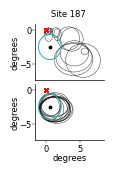

In [6]:
condition_type = 'SNR'
date='090817'
refelec=187
fig, axes= plt.subplots(2,1, figsize=(1,1.5))
plot_cell_rf_overlaps(df_=df, refelec=refelec, condition_type=condition_type, date=date, axes=axes)
plt.subplots_adjust(hspace=0.08)

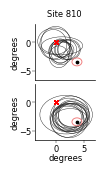

In [7]:
condition_type = 'SNR'
date='090817'
refelec=810
fig, axes= plt.subplots(2,1, figsize=(1,1.5))
plot_cell_rf_overlaps(df_=df, refelec=refelec, condition_type=condition_type, date=date, axes=axes)
plt.subplots_adjust(hspace=0.08)

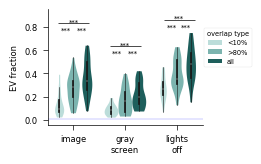

In [8]:
area='V4'
plot_rf_overlap_performance(df_filtered_all, area)

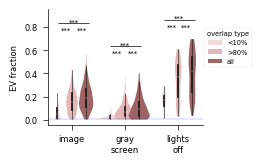

In [9]:
area='V1'
plot_rf_overlap_performance(df_filtered_all, area, gap=-0.5)